https://www.youtube.com/watch?v=gEIw2iUlFYc

- This program uses the Bollimger band strategy to determine when to buy and sell stock

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Loading Stocks data
df = pd.read_csv("streaming_stocks_data.csv")
df.columns = ['timestamp','last_price','volume','scrip_id']

# Set the index to be the date
df = df.set_index(pd.DatetimeIndex(df['timestamp'].values))
df.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [3]:
df.tail()

,timestamp,last_price,volume,scrip_id
2020-08-28 15:25:00+05:30,2020-08-28 15:25:00+05:30,111.55,10038,14
2020-08-28 15:26:00+05:30,2020-08-28 15:26:00+05:30,111.55,12389,14
2020-08-28 15:27:00+05:30,2020-08-28 15:27:00+05:30,111.55,19831,14
2020-08-28 15:28:00+05:30,2020-08-28 15:28:00+05:30,111.65,17638,14
2020-08-28 15:29:00+05:30,2020-08-28 15:29:00+05:30,111.70,32228,14


In [4]:
df1 = df[0:374]
df1.head()

,timestamp,last_price,volume,scrip_id
2020-08-03 09:16:00+05:30,2020-08-03 09:16:00+05:30,100.65,74643,14
2020-08-03 09:17:00+05:30,2020-08-03 09:17:00+05:30,100.60,58859,14
2020-08-03 09:18:00+05:30,2020-08-03 09:18:00+05:30,100.65,30118,14
2020-08-03 09:19:00+05:30,2020-08-03 09:19:00+05:30,100.60,49734,14
2020-08-03 09:20:00+05:30,2020-08-03 09:20:00+05:30,100.30,33832,14


In [5]:
df1.tail()

,timestamp,last_price,volume,scrip_id
2020-08-03 15:25:00+05:30,2020-08-03 15:25:00+05:30,100.30,8885,14
2020-08-03 15:26:00+05:30,2020-08-03 15:26:00+05:30,100.35,11887,14
2020-08-03 15:27:00+05:30,2020-08-03 15:27:00+05:30,100.50,35827,14
2020-08-03 15:28:00+05:30,2020-08-03 15:28:00+05:30,100.40,17850,14
2020-08-03 15:29:00+05:30,2020-08-03 15:29:00+05:30,100.40,8589,14


In [8]:
# Calculate simple moving average, standard deviation, upper band and the lower band
# Get the time period 20 day
period = 20
# Calculate the Simple moving average (SMA)
df1['SMA'] = df1['last_price'].rolling(window=period).mean()
# Get the standard deviation
df1['STD'] = df1['last_price'].rolling(window=period).std()
# Calculate the upper Bollinger band
df1['Upper'] = df1['SMA'] + (df1['STD'] * 2)
# Calculate the upper Bollinger band
df1['Lower'] = df1['SMA'] - (df1['STD'] * 2)

# Create a list of columns to keep
Column_list = ['last_price', 'SMA', 'Upper', 'Lower']

C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

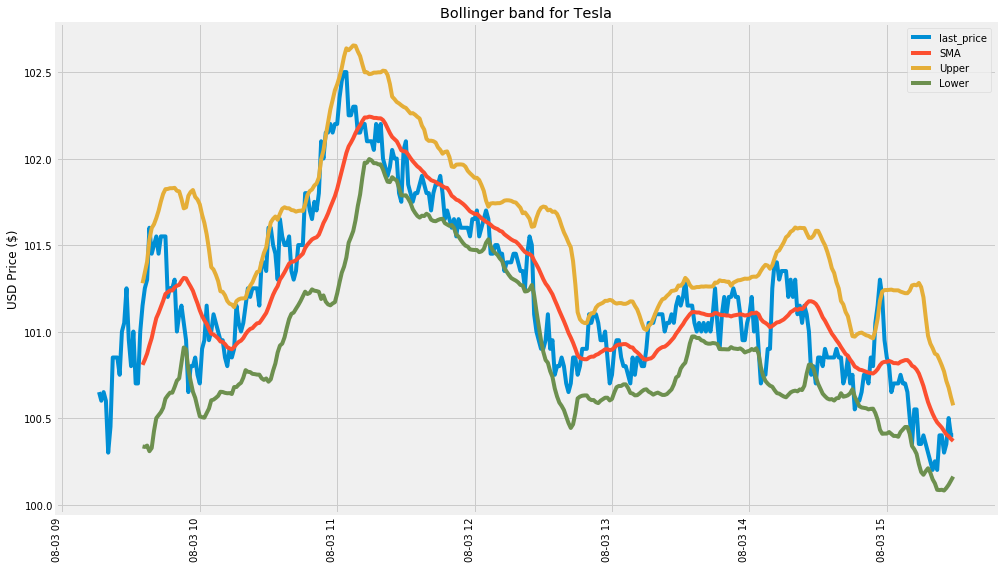

In [9]:
# Plot the data
df1[Column_list].plot(figsize=(15,10))
plt.title('Bollinger band for Tesla')
plt.ylabel('USD Price ($)')
plt.xticks(rotation=90)
plt.show()

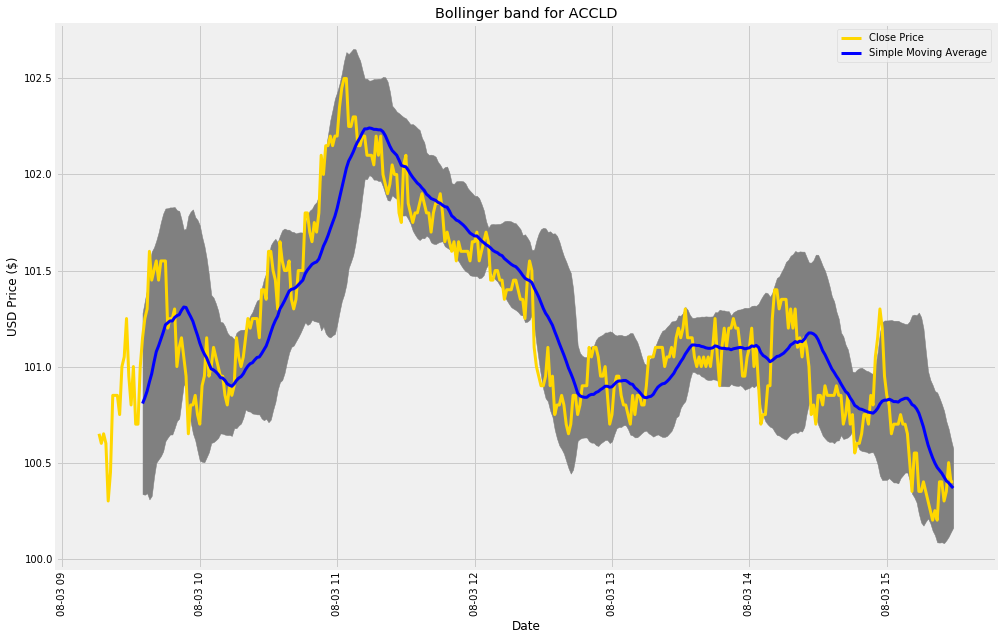

In [10]:
# Plot and shade the area between the two Bollinger data
# Get the figure and the figure size
fig = plt.figure(figsize=(15,10))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the dataframe
x_axis = df1.index
# Plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, df1['Upper'], df1['Lower'], color='grey')
# Plot the closing price and the moving average
ax.plot(x_axis, df1['last_price'], color='gold', lw=3, label='Close Price')
ax.plot(x_axis, df1['SMA'], color='blue', lw=3, label='Simple Moving Average')
# Set the title and show the image
ax.set_title('Bollinger band for ACCLD')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=90)
ax.legend()
plt.show()

In [11]:
# create a new dataframe
new_df = df1[period-1:]
# show the new data
new_df

,timestamp,last_price,volume,scrip_id,SMA,STD,Upper,Lower
2020-08-03 09:35:00+05:30,2020-08-03 09:35:00+05:30,101.15,15924,14,100.8075,0.235794,101.279087,100.335913
2020-08-03 09:36:00+05:30,2020-08-03 09:36:00+05:30,101.25,32462,14,100.8375,0.252292,101.342084,100.332916
2020-08-03 09:37:00+05:30,2020-08-03 09:37:00+05:30,101.30,15203,14,100.8725,0.265803,101.404106,100.340894
2020-08-03 09:38:00+05:30,2020-08-03 09:38:00+05:30,101.60,32603,14,100.9200,0.305821,101.531641,100.308359
2020-08-03 09:39:00+05:30,2020-08-03 09:39:00+05:30,101.45,8864,14,100.9625,0.317836,101.598172,100.326828
...,...,...,...,...,...,...,...,...
2020-08-03 15:25:00+05:30,2020-08-03 15:25:00+05:30,100.30,8885,14,100.4250,0.172062,100.769124,100.080876
2020-08-03 15:26:00+05:30,2020-08-03 15:26:00+05:30,100.35,11887,14,100.4050,0.154664,100.714329,100.095671
2020-08-03 15:27:00+05:30,2020-08-03 15:27:00+05:30,100.50,35827,14,100.3950,0.140394,100.675788,100.114212
2020-08-03 15:28:00+05:30,2020-08-03 15:28:00+05:30,100.40,17850,14,100.3800,0.120743,100.621487,100.138513


In [12]:
# Create a function to get the buy and sell signals
def get_signal(data):

    buy_signal = []
    sell_signal = []
          
    for i in range(len(data['last_price'])):
      if data['last_price'][i] > data['Upper'][i]:     # Then you should sell
          buy_signal.append(np.nan)
          sell_signal.append(data['last_price'][i])
          
      elif data['last_price'][i] < data['Lower'][i]:   # Then you should sell
          buy_signal.append(data['last_price'][i])
          sell_signal.append(np.nan)
 
      else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)

    return (buy_signal, sell_signal)

In [13]:
# Create two new columns
new_df['Buy'] = get_signal(new_df)[0]
new_df['Sell'] = get_signal(new_df)[1]

C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\deepusuresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


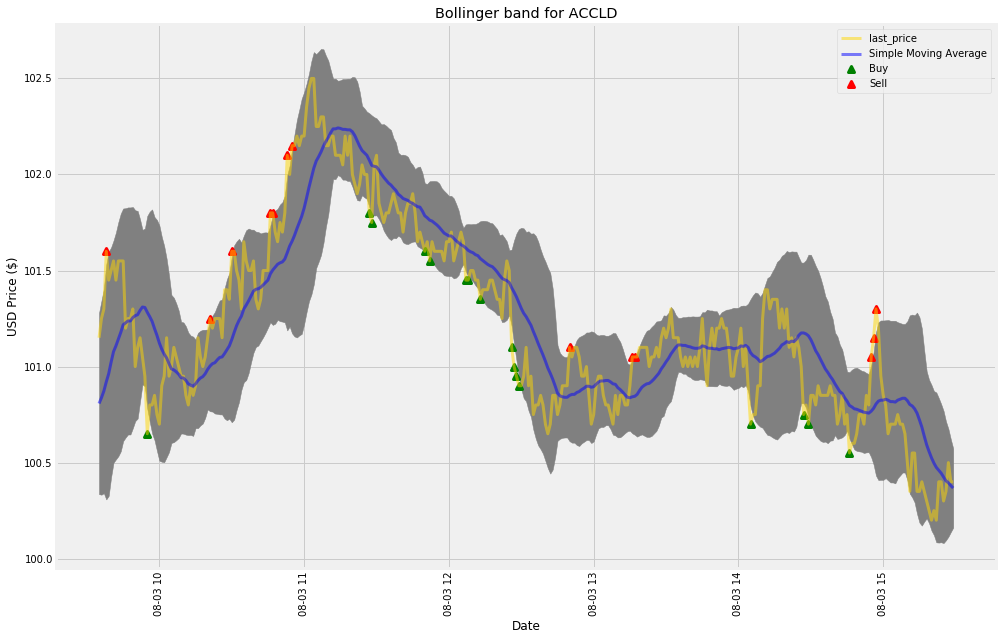

In [14]:
# Plot all of the data
# Get the figure and the figure size
fig = plt.figure(figsize=(15,10))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the dataframe
x_axis = new_df.index
# Plot and shade the area between the upper band and the lower band grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
# Plot the closing price and the moving average
ax.plot(x_axis, new_df['last_price'], color='gold', lw=3, label='last_price', alpha=0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label='Simple Moving Average', alpha=0.5)
ax.scatter(x_axis, new_df['Buy'], label='Buy', lw=3, color='green', marker='^', alpha=1)
ax.scatter(x_axis, new_df['Sell'], label='Sell', lw=3, color='red', marker='^', alpha=1)
# Set the title and show the image
ax.set_title('Bollinger band for ACCLD')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation=90)
ax.legend()
plt.show()